# Tarea 2
Integrantes:
- Pablo Josué Brenes Jiménez - 2016250460
- Steven Andrey Pacheco Portuguez - 2016125971
- Luis José Castillo Valverde - 2016094804

Movimos todos los archivos a celdas de jupyter. En las celdas de documentación previas a cada celda de código describimos los cambios o funciones agregadas. Al final del jupyter se encuentran tres muestras de ejecución, estas son:
- [x] Nuestra prueba de regresión, usando tanh y MSE.
- [x] Una prueba de clasificación utilizando tanh.
- [x] La clasificación original que se encontraba en el main (muestra de que los cambios no afectaron el funcionamiento).

# Imports

In [1]:
import numpy as np
import pickle
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import tkinter
import csv
from sklearn import datasets
from sklearn.datasets import fetch_openml

# Tools

## download_iris

In [2]:
iris = datasets.load_iris()
filename = 'iris.ds'
outfile = open(filename,'wb')
pickle.dump(iris, outfile)
outfile.close()

## download_nmist

In [3]:
# mnist = fetch_openml('mnist_784', cache=False)
# filename = 'nmist.ds'
# outfile = open(filename,'wb')
# pickle.dump(mnist, outfile)
# outfile.close()

# Data

## config_iris

In [4]:
class Config_iris:

  def __init__(self):

    #hyperparameters
    self.dataset_path = r"iris.ds"
    self.batch_size = 10
    self.validate_every_no_of_batches = 80
    self.epochs = 1000
    self.input_size = 4
    self.output_size = 3
    self.hidden_shapes = [10]
    self.lr = 0.0085
    self.has_dropout=True
    self.dropout_perc=0.5
    self.output_log = r"iris_log.txt"
    #iris dataset
    with open(self.dataset_path, "rb") as input_file:
        self.iris_dataset = pickle.load(input_file)
        self.x = np.array(self.iris_dataset['data'])
        self.x = self.x / np.max(self.x, axis=0)
        self.y = np.array(self.iris_dataset['target'])
    self.data = dataset(self.x, self.y, self.batch_size)
    self.splitter = dataset_splitter(self.data.compl_x, self.data.compl_y, self.batch_size, 0.6, 0.2)
    self.ds_train = self.splitter.ds_train
    self.ds_val = self.splitter.ds_val
    self.ds_test = self.splitter.ds_test

## config_mnist

In [5]:
class Config_mnist:

  def __init__(self):

    #hyperparameters
    self.dataset_path = r"nmist.ds"
    self.batch_size = 32
    self.validate_every_no_of_batches = 600
    self.epochs = 10
    self.input_size = 784
    self.output_size = 10
    self.hidden_shapes = [512, 128]
    self.lr = 0.0085
    self.has_dropout=True
    self.dropout_perc=0.5
    self.output_log = r"nmist_log.txt"
    with open(self.dataset_path, "rb") as input_file:
        self.nmist = pickle.load(input_file)
        self.x = np.array(self.nmist.data)
        self.x = self.x / 255.0
        self.y = np.array(self.nmist.target).astype(np.int)
        #print(x)
    self.data = dataset(self.x, self.y, self.batch_size)
    self.splitter = dataset_splitter(self.data.compl_x, self.data.compl_y, self.batch_size, 0.8, 0.2)
    self.ds_train = self.splitter.ds_train
    self.ds_val = self.splitter.ds_val
    self.ds_test = self.splitter.ds_test

## config_xor

In [6]:
class Config_xor:

  def __init__(self):

    #hyperparameters
    self.batch_size = 2
    self.validate_every_no_of_batches = 8
    self.epochs = 2000
    self.input_size = 2
    self.output_size = 2
    self.hidden_shapes = [2]
    self.lr = 0.085
    self.has_dropout=False
    self.dropout_perc=0.5
    self.output_log = "xor_log.txt"
    #XOR dataset - baseline to check backprop, update and forward calculations
    self.ds_train = dataset(np.array([[0,0], [0,1], [1,0], [1,1]]), np.array([0,1,1,0]),  self.batch_size)
    self.ds_test = dataset(np.array([[0,0], [0,1], [1,0], [1,1]]), np.array([0,1,1,0]),  self.batch_size)
    self.ds_val = dataset(np.array([[0,0], [0,1], [1,0], [1,1]]), np.array([0,1,1,0]),  self.batch_size)

## config_sin
Esta es la clase que agregamos con los parámetros para aproximar la función seno, también está la función que genera estos datos.

In [7]:
def sinFunction():
    x = np.linspace(0.0, 2.0 * np.pi, 800).reshape(-1, 1)
    y = np.sin(x)

    return x , y

In [8]:
class Config_sin:
  
  def __init__(self):

    #hyperparameters
    self.batch_size = 64
    self.validate_every_no_of_batches = 300
    self.epochs = 10000
    self.input_size = 1
    self.output_size = 1
    self.hidden_shapes = [100, 100, 100]
    self.lr = 0.05
    self.has_dropout=False
    self.dropout_perc=0.5
    self.output_log = r"sin_log.txt"

    self.x, self.y = sinFunction()
    self.data = dataset(self.x, self.y, self.batch_size)
    self.splitter = dataset_splitter(self.data.compl_x, self.data.compl_y, self.batch_size, 0.6, 0.2)
    self.ds_train = self.splitter.ds_train
    self.ds_val = self.splitter.ds_val
    self.ds_test = self.splitter.ds_test

## config
Este archivo la modificamos para agregar el caso de SIN al enumerado (los datos los generamos a partir de una función seno).

In [9]:
class ConfigEnum:
    XOR, IRIS, MNIST, SIN = range(4)

#factory-like class which produces different configs for each dataset tested
class hyperparams():

    def __init__(self, config_enum=1): #default is iris based on reqs
        if config_enum==ConfigEnum.XOR:
            config = Config_xor()
        elif config_enum==ConfigEnum.IRIS:
            config = Config_iris()
        elif config_enum==ConfigEnum.SIN:
            config = Config_sin()
        else:
            config = Config_mnist()
        self.config = config
        self.batch_size = config.batch_size
        self.validate_every_no_of_batches = config.validate_every_no_of_batches
        self.epochs = config.epochs
        self.input_size = config.input_size
        self.output_size = config.output_size
        self.hidden_shapes = config.hidden_shapes
        self.lr = config.lr
        self.has_dropout= config.has_dropout
        self.dropout_perc= config.dropout_perc
        self.output_log = config.output_log
        self.ds_train = config.ds_train
        self.ds_test = config.ds_test
        self.ds_val = config.ds_val

    def split_again(self, perc_train, perc_val):
        self.ds_train, self.ds_val, self.ds_test = self.config.splitter.split(self.batch_size, perc_train, perc_val)

## dataset

In [10]:
#shuffles data and labels keeping indexes
def _shuffle(x, y):
    assert(len(x) == len(y)), "Make sure data and labels have the same lenght!"
    rand_indexes = np.random.permutation(len(x))
    return x[rand_indexes], y[rand_indexes]

#represents a dataset, useful for val dataset, train dataset and test dataset.
class dataset():
    def __init__(self, x, y, batch_size):
        #assert(len(y) % batch_size == 0), "Make sure batch size divides number of items perfectly!"
        self.compl_x = x[:]
        self.compl_y = y[:]
        self.batch_size = batch_size
        self.reset()
        self.size = len(self.compl_y)

    def shapes(self):
        return ( self.compl_x.shape, self.compl_y.shape )

    def view(self):
        print(self.compl_x, self.compl_y)

    #iterate over the dataset
    def next(self):
        if self.left_items < self.batch_size:
            x = self.x[self.current:]
            y = self.y[self.current:]
            self.current += len(self.x)
            self.left_items = 0
            return x, y
        else:
            x = self.x[self.current:self.current+self.batch_size]
            y = self.y[self.current:self.current+self.batch_size]
            self.current += self.batch_size
            self.left_items -= self.batch_size
            return x, y

    def iter_done(self):
        return self.left_items == 0

    def reset(self):
        self.x = self.compl_x[:]
        self.y = self.compl_y[:]
        self.x, self.y = _shuffle(self.x, self.y)
        self.current = 0
        self.left_items = len(self.compl_y)

#splits a complete dataset into 3 subsets for train, val and test, by percentage
class dataset_splitter():
    def __init__(self, x, y, batch_size, perc_train=0.8, perc_val=0.2):
        self.x = x
        self.y = y
        self.split(batch_size, perc_train, perc_val)

    def _split_by_limits(self, batch_size, train_limit, val_limit):
        self.ds_train = dataset(self.x[:train_limit], self.y[:train_limit], batch_size)
        self.ds_train.reset()
        self.ds_val = dataset(self.x[train_limit:val_limit], self.y[train_limit:val_limit], batch_size)
        self.ds_val.reset()
        self.ds_test = dataset(self.x[val_limit:], self.y[val_limit:], batch_size)
        self.ds_test.reset()

    def split(self, batch_size, perc_train, perc_val):
        self.x, self.y = _shuffle(self.x, self.y)
        n = len(self.x)
        train_limit = int(n * perc_train)
        temp = int(train_limit * (1.0 - perc_val))
        val_limit = train_limit - temp
        train_limit = temp
        #print(n, train_limit, val_limit)
        self._split_by_limits(batch_size, train_limit, train_limit+val_limit)
        print(self.ds_train.shapes(), self.ds_val.shapes(), self.ds_test.shapes())
        return self.ds_train, self.ds_val, self.ds_test

# Report

## dumps

In [11]:
class nnlogger():
    def __init__(self, output_file, header):
        self.csv_file = open(output_file, "w")
        self.writer = csv.writer(self.csv_file, delimiter=',')
        self.writer.writerow( header )

    def write(self, line):
        self.writer.writerow( line )

    def close(self):
        self.csv_file.close()

class historian():

    def __init__(self, figsize=(8,6)):
        self.iter = []
        self.acc =  []
        self.loss = []

    def add(self, iter, loss, accuracy):
        self.iter += [ iter ]
        self.acc +=  [ accuracy ]
        self.loss += [ loss ]


class nnplotter():

    @classmethod
    def view(cls, val_history, train_history):
        ax = plt.subplot(2, 1, 1)
        ax.plot(val_history.iter, val_history.loss, 'b--', label="val")
        ax.plot(train_history.iter, train_history.loss, 'r--', label="train")
        plt.ylabel("loss")
        ax.legend()

        ax2 = plt.subplot(2, 1, 2)
        ax2.plot(val_history.iter, val_history.acc, 'b--', label="val")
        ax2.plot(train_history.iter, train_history.acc, 'r--', label= "train")
        plt.ylabel("accuracy")
        plt.xlabel("iteration")
        ax2.legend()

        plt.show()

# NN

## funcs
Acá es dónde agregamos las funciones nuevas solicitadas, tanh, la derivada de tanh, MSE y la derivada de MSE para los cálculos, están comentadas, al final del archivo.

In [12]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def sigmoid_grad(s):
    return s * (1.0 - s)

def relu(x):
    return x * (x > 0)

def  relu_grad(x):
    return 1.0 * (x > 0)

#with numerical stability
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def logloss(x, y):
    probs = softmax(x)
    return probs, -y * np.log(probs)

def logloss_grad(probs, y):
    probs[:,y] -= 1.0
    return probs

def batch_hits(x, y):
    return np.sum(np.argmax(x, axis=1) == y)

# Cross Entropy Loss
def crossEntropyLoss(x, y):
    return -np.mean(np.sum(y * np.log(x + 1e-15), axis=1))

# CrossEntropyLoss and Softmax derivates
def crossEntropySoftmax(x, y):
    return y - x

########
# Tanh #
########
def tanh(x):
    return np.tanh(x)

############
# Tanh dev #
############
def tanh_grad(s):
    return 1 - np.tanh(s) ** 2

#######
# MSE #
#######
def MSE(x, y):
    return 1/x.shape[0] * np.sum((x - y) ** 2)

###########
# MSE dev #
###########
def MSE_grad(y, probs):
    res = 2/y.shape[0] * (y - probs)
    return res

## op

In [13]:
#used as baseline for any differenciable layer
class op():

    def __init__(self, i_size, o_size):
        self.i_size = i_size
        self.o_size = o_size
        self._xavier_init()
        self.o = np.zeros(o_size)
        self.x = None #will be assigned during forward
        self.grads = np.zeros((o_size, i_size))

    def _xavier_init(self):
        self.W = np.random.randn(self.i_size, self.o_size) / np.sqrt(self.i_size)
        self.b = np.random.randn()

    def forward(self, x):
        pass

    def backward(self, prev):
        pass

    def update(self, lr):
        self.W += lr * np.dot(self.x.T, self.grads)
        self.b += lr * np.mean(self.grads, axis = 0)

## dense

In [14]:
class dense(op):

    def __init__(self, i_size, o_size, func_acti, func_acti_grad):
        super(dense, self).__init__(i_size, o_size)
        self.func_acti = func_acti
        self.func_acti_grad = func_acti_grad

    def forward(self, x):
        self.x = x
        self.o = self.func_acti(np.dot(x, self.W) + self.b)
        return self.o

    def backward(self, prev):
        self.grads = self.func_acti_grad(prev.x) * np.dot(prev.grads, prev.W.T)

    def dropout(self, prob):
        self.mask = np.random.binomial(size=self.o.shape[1], n=1, p=1-prob)
        return self.mask

## loss_layer
Reconstruimos esta clase para que sea modular, se puede pasar por parámetro las funciones de activación y de costo a utilizar durante la instanciación. Puede ver como entran por parámetro y como se asignan las nuevas funciones, para el caso del código original que trabaja con entropía cruzada mantuvimos un caso especial.

In [15]:
#implements a log loss layer
class loss_layer(op):

    def __init__(self, i_size, o_size, func_acti, func_acti_grad, func_loss, func_loss_grad):
        super(loss_layer, self).__init__(i_size, o_size)

        self.func_acti = func_acti
        self.func_acti_grad = func_acti_grad
        self.func_loss = func_loss
        self.func_loss_grad = func_loss_grad
        if func_acti == softmax:
            self.func_backward = crossEntropySoftmax
        else:
            self.func_backward = lambda x, y : self.func_acti_grad(self.z) * self.func_loss_grad(y, self.o)

    def forward(self, x):
        self.x = x
        self.z = np.dot(x, self.W) + self.b
        self.o = self.func_acti(self.z)
        return self.o

    def backward(self, y, rewards=None):
        if self.func_acti == softmax:
            one_hot = np.zeros(self.o.shape)
            one_hot[np.arange(self.o.shape[0]), y] = 1
        else:
            one_hot = y

        if rewards is not None:
            self.grads = self.func_backward(self.o, one_hot) * rewards
        else:
            self.grads = self.func_backward(self.o, one_hot)

    def loss(self, y):
        if self.func_acti == softmax:
            one_hot = np.zeros(self.o.shape, dtype=np.int)
            one_hot[np.arange(self.o.shape[0]), y] = 1
        else:
            one_hot = y
        
        #fixed_section = np.nan_to_num((1 - one_hot) * np.log(1 - self.o))
        return self.func_loss(self.o, one_hot)

## model

In [16]:
class model():
    def __init__(self, input_size, output_size, hidden_shapes, func_acti, func_acti_grad, func_acti_loss_layer , func_acti_loss_layer_grad, func_loss_loss_layer, func_loss_loss_layer_grad, has_dropout=True, dropout_perc=0.5):
        assert(len(hidden_shapes) > 0), "NN must have at least 1 hidden layer!"
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_shapes = hidden_shapes
        self.hidden_amount = len(self.hidden_shapes)
        self.hidden_layers = []
        self.has_dropout = has_dropout
        self.dropout_perc = dropout_perc
        self.populate_layers(func_acti, func_acti_grad, func_acti_loss_layer, func_acti_loss_layer_grad, func_loss_loss_layer, func_loss_loss_layer_grad)


    def populate_layers(self, func_acti, func_acti_grad, func_acti_loss_layer, func_acti_loss_layer_grad, func_loss_loss_layer, func_loss_loss_layer_grad):
        i_size = self.input_size
        for i in range(0, self.hidden_amount):
            self.hidden_layers.append(dense(i_size, self.hidden_shapes[i], func_acti, func_acti_grad))
            i_size = self.hidden_shapes[i]
        self.loss_layer = loss_layer(i_size, self.output_size, func_acti_loss_layer, func_acti_loss_layer_grad, func_loss_loss_layer, func_loss_loss_layer_grad)

    def forward(self, x, y, train=True):
        self.dropout_masks = []
        data = x
        for i in range(0, self.hidden_amount):
            data = self.hidden_layers[i].forward(data)
            if train and self.has_dropout: #do dropout only during training
                mask = self.hidden_layers[i].dropout(self.dropout_perc)
                data *= mask
                self.dropout_masks.append(mask)

        o = self.loss_layer.forward(data)
        loss = self.loss_layer.loss(y)
        #print(loss, o)
        return o, loss

    def predict(self, x):
        data = x
        for i in range(0, self.hidden_amount):
            data = self.hidden_layers[i].forward(data)
        o = self.loss_layer.forward(data)
        return o

    #alpha is used for reinforcement learning fir reward
    def backward(self, y, o, rewards=None):
        self.loss_layer.backward(y, rewards)
        prev = self.loss_layer
        for i in reversed(range(self.hidden_amount)):
            self.hidden_layers[i].backward(prev)
            prev = self.hidden_layers[i]
            if self.has_dropout:
                self.hidden_layers[i].grads *= self.dropout_masks[i]  # also mask here

    def update(self, lr):
        for i in range(self.hidden_amount):
            self.hidden_layers[i].update(lr)
        self.loss_layer.update(lr)

# Train-Test (Main)

In [17]:
def test(ds, verbose=False, phase="Validation"):
    ds.reset()
    hits = 0
    mean_loss = 0
    while not(ds.iter_done()):
        x, y = ds.next()
        o, batch_loss = nn.forward(x, y, train=False)
        hits += batch_hits(o, y)
        mean_loss += np.mean(batch_loss)
        #if verbose:
        #    print("Loss: " + str(mean_loss), " Predicted: " + str(o), " Expected: " + str(y))
    accuracy = float(hits) / float(ds.size)
    mean_loss = float(mean_loss) / float(ds.size)
    if verbose:
        print(phase + " Accuracy: " + str(accuracy) + " Mean Loss " + str(mean_loss))
    return accuracy, mean_loss

In [18]:
def train(nn, hp, val_hist, train_hist, logger):
    cur_epoch = 1
    cur_iter = 1
    for i in range(1, hp.epochs+1):
        train_loss = 0
        hits = 0
        cur_trained = 0
        while not(hp.ds_train.iter_done()):
            x, y = hp.ds_train.next()
            o, batch_loss = nn.forward(x, y)
            nn.backward(y,o)
            nn.update(hp.lr)

            hits += batch_hits(o, y)
            cur_trained += len(x)
            train_loss += np.mean(batch_loss)

            if cur_iter % hp.validate_every_no_of_batches == 0:

                train_accuracy = float(hits) / float(cur_trained)
                train_loss = float(train_loss) / float(cur_trained)
                train_hist.add(cur_iter, train_loss, train_accuracy)
                logger.write( (cur_epoch, "Training", cur_iter, train_accuracy, train_loss) )
                hits = 0
                train_loss = 0

                val_accuracy, val_loss = test(hp.ds_val, True)
                val_hist.add(cur_iter, val_loss, val_accuracy)
                logger.write( (cur_epoch, "Val", cur_iter, val_accuracy, val_loss) )
            cur_iter+=1
        cur_epoch+=1
        hp.ds_train.reset()
    return val_hist

# Muestras de ejecución.

## Prueba de regresión, utilizando MSE como función de costo y tanh como función de activación en la última capa.

In [19]:
#This is for a regression problem.
hp = hyperparams(ConfigEnum.SIN)
nn = model(hp.input_size, hp.output_size, hp.hidden_shapes, sigmoid, sigmoid_grad, tanh, tanh_grad, 
MSE, MSE_grad,  has_dropout=hp.has_dropout, dropout_perc=hp.dropout_perc)

val_hist = historian()
train_hist = historian()
logger = nnlogger(hp.output_log, ("Epoch", "Phase", "Iteration", "Accuracy", "Loss") )
train(nn, hp, val_hist, train_hist, logger)
test(hp.ds_test, verbose=True, phase="Test")

((384, 1), (384, 1)) ((96, 1), (96, 1)) ((320, 1), (320, 1))
Validation Accuracy: 0.0 Mean Loss 0.017014855697344854
Validation Accuracy: 0.0 Mean Loss 0.0036968424833682123
Validation Accuracy: 0.0 Mean Loss 0.002713944010191893
Validation Accuracy: 0.0 Mean Loss 0.0027775651067815828
Validation Accuracy: 0.0 Mean Loss 0.002665708009633262
Validation Accuracy: 0.0 Mean Loss 0.002565757674616842
Validation Accuracy: 0.0 Mean Loss 0.0024412324690287895
Validation Accuracy: 0.0 Mean Loss 0.0025866239731168693
Validation Accuracy: 0.0 Mean Loss 0.002520759675736496
Validation Accuracy: 0.0 Mean Loss 0.0022948435726231602
Validation Accuracy: 0.0 Mean Loss 0.002519201775326358
Validation Accuracy: 0.0 Mean Loss 0.0024030627374786403
Validation Accuracy: 0.0 Mean Loss 0.00247828351288481
Validation Accuracy: 0.0 Mean Loss 0.0026284829477373002
Validation Accuracy: 0.0 Mean Loss 0.002373810320302245
Validation Accuracy: 0.0 Mean Loss 0.002184430322864337
Validation Accuracy: 0.0 Mean Loss 0.

(0.0, 0.00021136661671526712)

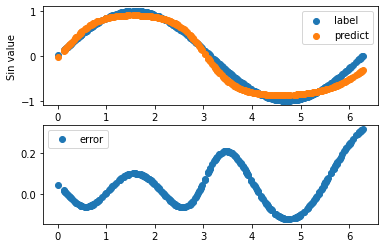

In [21]:
y_test = nn.predict(hp.ds_test.x)
plt.subplot(211)
plt.scatter(hp.ds_test.x, hp.ds_test.y, label='label')
plt.scatter(hp.ds_test.x, y_test, label='predict')
plt.xlabel('#')
plt.ylabel('Sin value')
plt.legend()
plt.subplot(212)
plt.scatter(hp.ds_test.x, hp.ds_test.y - y_test, label='error')
plt.legend()
plt.show()

logger.close()

## Prueba de clasificación utilizando la función tanh implementada.

In [22]:
#load hyperparameters and settings according to dataset enum
hp = hyperparams(ConfigEnum.XOR)
#hp = hyperparams(ConfigEnum.IRIS)
#hp = hyperparams(ConfigEnum.MNIST)

#model has number of inputs, number of outputs, and list with sizes of hidden layers
#requires at least 1 hidden layer, else fails assert

#This is adding the TANH activation Function to the model.
nn = model(hp.input_size, hp.output_size, hp.hidden_shapes, tanh, tanh_grad, softmax, None, 
crossEntropyLoss, None,  has_dropout=hp.has_dropout, dropout_perc=hp.dropout_perc)

val_hist = historian()
train_hist = historian()
logger = nnlogger(hp.output_log, ("Epoch", "Phase", "Iteration", "Accuracy", "Loss") )
train(nn, hp, val_hist, train_hist, logger)
test(hp.ds_test, verbose=True, phase="Test")

Validation Accuracy: 0.5 Mean Loss 0.3726039580219074
Validation Accuracy: 0.5 Mean Loss 0.35857121678037407
Validation Accuracy: 0.5 Mean Loss 0.3514949707434341
Validation Accuracy: 0.5 Mean Loss 0.3472671656184749
Validation Accuracy: 0.5 Mean Loss 0.3444653143577916
Validation Accuracy: 0.5 Mean Loss 0.34236243252411824
Validation Accuracy: 0.5 Mean Loss 0.34047961529633985
Validation Accuracy: 0.5 Mean Loss 0.33846710716141903
Validation Accuracy: 0.5 Mean Loss 0.33645813648939615
Validation Accuracy: 0.75 Mean Loss 0.33407467993633233
Validation Accuracy: 0.75 Mean Loss 0.33134692794884973
Validation Accuracy: 0.75 Mean Loss 0.3282076802474383
Validation Accuracy: 0.75 Mean Loss 0.3251590968178835
Validation Accuracy: 0.75 Mean Loss 0.3218834011436653
Validation Accuracy: 0.75 Mean Loss 0.31891519890050046
Validation Accuracy: 0.75 Mean Loss 0.31527160224721706
Validation Accuracy: 0.75 Mean Loss 0.3117390721362353
Validation Accuracy: 0.75 Mean Loss 0.3083858039392216
Validation

(1.0, 0.003374734604536273)

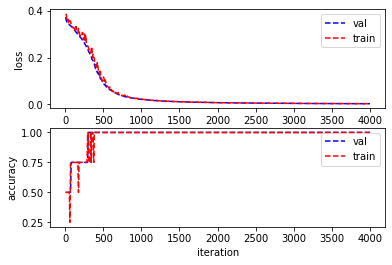

In [24]:
nnplotter.view(val_hist, train_hist) #see results on plot

## Prueba de clasificación base, la ejecución original del profesor.

In [25]:
#load hyperparameters and settings according to dataset enum
hp = hyperparams(ConfigEnum.XOR)
#hp = hyperparams(ConfigEnum.IRIS)
#hp = hyperparams(ConfigEnum.MNIST)

#model has number of inputs, number of outputs, and list with sizes of hidden layers
#requires at least 1 hidden layer, else fails assert

#This is the base model
nn = model(hp.input_size, hp.output_size, hp.hidden_shapes, sigmoid, sigmoid_grad, softmax, None, 
crossEntropyLoss, None,  has_dropout=hp.has_dropout, dropout_perc=hp.dropout_perc)

val_hist = historian()
train_hist = historian()
logger = nnlogger(hp.output_log, ("Epoch", "Phase", "Iteration", "Accuracy", "Loss") )
train(nn, hp, val_hist, train_hist, logger)
test(hp.ds_test, verbose=True, phase="Test")

Validation Accuracy: 0.5 Mean Loss 0.34753861169288264
Validation Accuracy: 0.5 Mean Loss 0.3462667074996144
Validation Accuracy: 0.25 Mean Loss 0.34554465939683404
Validation Accuracy: 0.5 Mean Loss 0.3452303063731442
Validation Accuracy: 0.5 Mean Loss 0.3449989349766521
Validation Accuracy: 0.5 Mean Loss 0.34488851197243464
Validation Accuracy: 0.5 Mean Loss 0.3447975385022316
Validation Accuracy: 0.5 Mean Loss 0.34471746037093237
Validation Accuracy: 0.5 Mean Loss 0.34464302019097803
Validation Accuracy: 0.5 Mean Loss 0.344558231755014
Validation Accuracy: 0.5 Mean Loss 0.3444795999493796
Validation Accuracy: 0.5 Mean Loss 0.3444001631845913
Validation Accuracy: 0.5 Mean Loss 0.34431488867652604
Validation Accuracy: 0.5 Mean Loss 0.34422972509094296
Validation Accuracy: 0.5 Mean Loss 0.34414001021502666
Validation Accuracy: 0.5 Mean Loss 0.34404710161486507
Validation Accuracy: 0.5 Mean Loss 0.3439551638923921
Validation Accuracy: 0.5 Mean Loss 0.34385174895564835
Validation Accurac

(0.5, 0.17867217722090745)

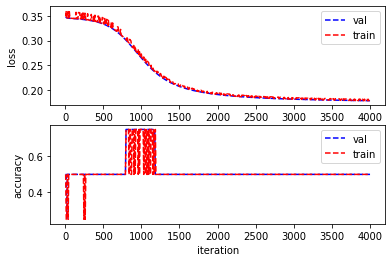

In [27]:
nnplotter.view(val_hist, train_hist) #see results on plot